In [2]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from pennylane import numpy as np
import pennylane as qml
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MaxAbsScaler 
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as confusion_matrix
from sklearn.metrics import f1_score as f1
from sklearn.metrics import recall_score as recall
from sklearn.decomposition import PCA 
from qiskit import *
import seaborn as sns
import plotly.express as px
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer, GradientDescentOptimizer

import matplotlib.pyplot as plt


In [3]:
mnist = load_digits()
pd.DataFrame(mnist.data).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


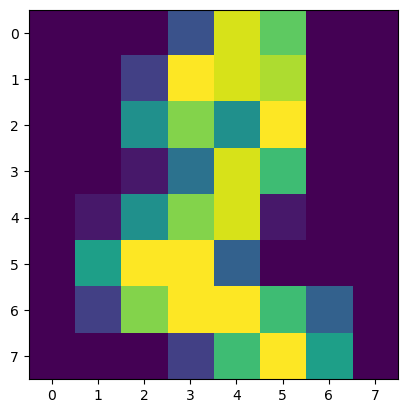

In [4]:
pd.DataFrame(mnist.target).head()
plt.imshow(mnist.images[2])

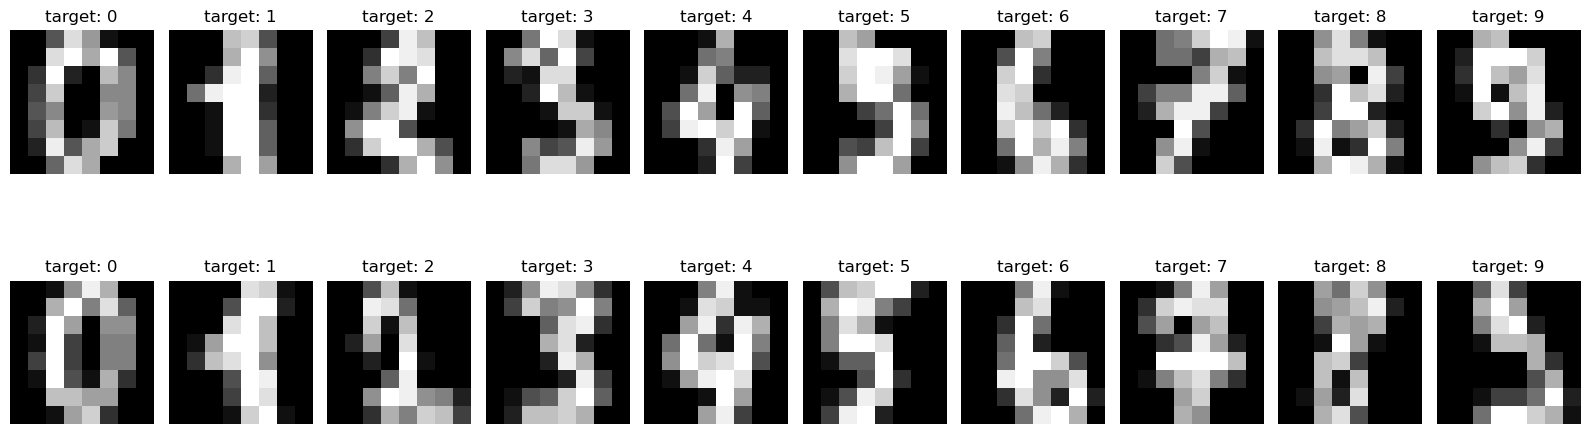

In [5]:
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i], cmap='gray')
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")
    
plt.tight_layout()

In [6]:

number_of_data_points = 200
y = pd.DataFrame(mnist.target[0:number_of_data_points])
#x= mnist.images
x_data = pd.DataFrame()
for i in range(len(mnist.images[0:number_of_data_points])):
    x=mnist.images[i]
    new_x = pd.DataFrame()
    for j in range(len(x[0])):
        new_val = pd.Series()
        new_val= pd.concat([new_val,pd.Series(x[j])])
        #new_val= new_val.to_frame().T
        #print(new_val)
        #print(new_val[0])

        new_x= pd.concat([new_x,(new_val.to_frame().T)],axis=1,ignore_index= True)
    x_data = pd.concat([x_data,new_x],ignore_index=False,axis = 0)
    print(x_data)


    0    1    2     3    4    5    6    7    8    9   ...   54   55   56   57  \
0  0.0  0.0  5.0  13.0  9.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    58    59    60   61   62   63  
0  6.0  13.0  10.0  0.0  0.0  0.0  

[1 rows x 64 columns]
    0    1    2     3     4    5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0  0.0  0.0  0.0  12.0  13.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
0  0.0  0.0  11.0  16.0  10.0  0.0  0.0  

[2 rows x 64 columns]
    0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0

In [7]:
copyOfx = x_data

scaler = MaxAbsScaler() 

x_data = scaler.fit_transform(x_data)

normalizer = Normalizer().fit(x_data)


normalizer.transform(x_data)


array([[0.        , 0.        , 0.08710085, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.15401482, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.23745323, 0.16439069,
        0.        ],
       ...,
       [0.        , 0.        , 0.03067593, ..., 0.15337963, 0.01887749,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.09218692, ..., 0.18437384, 0.01891014,
        0.        ]])

In [8]:
print(x_data)


[[0.         0.         0.3125     ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.625      0.         0.        ]
 [0.         0.         0.         ... 1.         0.69230769 0.        ]
 ...
 [0.         0.         0.125      ... 0.625      0.07692308 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.375      ... 0.75       0.07692308 0.        ]]


In [9]:
print(y)

     0
0    0
1    1
2    2
3    3
4    4
..  ..
195  6
196  6
197  6
198  4
199  9

[200 rows x 1 columns]


In [10]:
pca = PCA(n_components = 3 ) 
 
 
 
xs_data = pca.fit_transform(x_data) 
 

In [11]:
for i in range(len(y[0])):       
    if y.loc[i,0]!=1:
        y.loc[i,0]= 0


In [12]:

x_train, x_test, y_train, y_test = train_test_split(xs_data, y, train_size = 0.8)

x_traindf = pd.DataFrame(x_train)
x_testdf = pd.DataFrame(x_test)
y_traindf = pd.DataFrame(y_train)
y_testdf = pd.DataFrame(y_test)

x_test =np.array(x_test)
x_train = np.array(x_train)
y_train = np.array(y_train)
y_test = np.array(y_test)


t_test=y_test.transpose()[0]
ylist = []
y_train = y_train.transpose()
for i in range(len(y_train)):
    
    ylist.append(y_train[i])


y_train = np.array(ylist,requires_grad=False)
y_train=y_train[0]

ylist = []
y_test = y_test.transpose()
for i in range(len(y_test)):
    
    ylist.append(y_test[i])


y_test = np.array(ylist,requires_grad=False)
y_test=y_test[0]
xlist = []
#x_train = x_train.transpose()
for i in range(len(x_train)):
    
    xlist.append(x_train[i])


x_train = np.array(xlist,requires_grad=False)
print(y_train[0])

0


In [13]:

X_train = x_train
X_test =x_test
print(len(y_test))
print(len(X_test))
print(x_test)


40
40
[[ 0.72627655  0.52496091  0.30360388]
 [ 0.18456585 -0.3203903   1.81907418]
 [ 0.46939521 -1.2129563  -0.73999892]
 [-0.32000361  0.54756452  0.86573635]
 [-1.59324227 -0.23391573  0.34676108]
 [-0.90066248  1.31483971 -0.54042934]
 [-0.32054636 -0.45456535  1.03478014]
 [-0.92313728  0.7535842   0.90025524]
 [ 0.01692164 -0.55359797 -0.136262  ]
 [ 0.60320343 -1.25371723 -0.83619291]
 [-0.70252627 -0.85157242 -1.10591005]
 [ 0.19597005 -0.18657939  0.31097155]
 [-0.21697816 -0.50027518  0.87038778]
 [ 1.84161503 -0.59059613 -0.20227549]
 [ 0.01218298  1.7090917  -0.27731621]
 [ 0.24383355  0.23314626  0.51214266]
 [-1.44469743 -0.75674552 -0.04495043]
 [-0.43525998  0.29897835  0.94982664]
 [ 0.47480465 -0.31694188  1.71447136]
 [ 0.63697344 -1.21634237 -0.8514897 ]
 [ 0.57101421 -0.72805405 -0.56725411]
 [ 0.58715625 -0.99085418 -1.02806863]
 [ 0.09582101  1.3624207   0.43207134]
 [-0.11299477  1.14622905 -0.11078471]
 [-0.9368369  -0.98300331 -1.10954782]
 [ 0.5694886  -0.55

In [14]:
dev = qml.device("lightning.qubit", wires=1)
@qml.qnode(dev)
def qcircuit(params, x, y):

    for p in params:
        qml.Rot(*x, wires=0)
        qml.Rot(*p, wires=0)
    return qml.expval(qml.Hermitian(y, wires=[0]))



In [15]:

class Reuploader():
    
    num_layers =0
    learning_rate=0
    epochs=0 
    batch_size=0
    model = np.array
    opt = 0
    dev=0
    params=0
    state_labels =0
    label_0 = [[1], [0]]
    label_1 = [[0], [1]]
    
   

    def __init__(self,dev,num_layers = 4, learning_rate = 0.6, epochs= 10, batch_size = 32, ):

        self.num_layers = num_layers
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.opt = AdamOptimizer(learning_rate, beta1=0.9, beta2=0.999)
        self.dev = dev 
        self.params = np.random.uniform(size=(num_layers, 3), requires_grad=True)
        self.state_labels = np.array([self.label_0, self.label_1], requires_grad=False)
        

    
    def density_matrix(self,state):
        """Calculates the density matrix representation of a state.

        Args:
            state (array[complex]): array representing a quantum state vector

        Returns:
            dm: (array[complex]): array representing the density matrix
        """
        return state * np.conj(state).T






    def cost(self, params, x, y, state_labels=None):
        """Cost function to be minimized.

        Args:
            params (array[float]): array of parameters
            x (array[float]): 2-d array of input vectors
            y (array[float]): 1-d array of targets
            state_labels (array[float]): array of state representations for labels

        Returns:
            float: loss value to be minimized
        """
        # Compute prediction for each input in data batch
        loss = 0.0
        dm_labels = [self.density_matrix(s) for s in state_labels]
        for i in range(len(x)):
            f = qcircuit(params, x[i], dm_labels[y[i]])
            loss = loss + (1 - f) ** 2
        return loss / len(x)

    def test(self,params, x, y, state_labels=None):
        """
        Tests on a given set of data.

        Args:
            params (array[float]): array of parameters
            x (array[float]): 2-d array of input vectors
            y (array[float]): 1-d array of targets
            state_labels (array[float]): 1-d array of state representations for labels

        Returns:
            predicted (array([int]): predicted labels for test data
            output_states (array[float]): output quantum states from the circuit
        """
        fidelity_values = []
        dm_labels = [self.density_matrix(s) for s in state_labels]
        predicted = []

        for i in range(len(x)):
            fidel_function = lambda y: qcircuit(params, x[i], y)
            fidelities = [fidel_function(dm) for dm in dm_labels]
            best_fidel = np.argmax(fidelities)

            predicted.append(best_fidel)
            fidelity_values.append(fidelities)

        return np.array(predicted), np.array(fidelity_values)


    def accuracy_score(self,y_true, y_pred):
        """Accuracy score.

        Args:
            y_true (array[float]): 1-d array of targets
            y_predicted (array[float]): 1-d array of predictions
            state_labels (array[float]): 1-d array of state representations for labels

        Returns:
            score (float): the fraction of correctly classified samples
        """
    
        score = y_true == y_pred
        return score.sum() / len(y_true)


    def iterate_minibatches(self, inputs, targets, batch_size):
        """
        A generator for batches of the input data

        Args:
            inputs (array[float]): input data
            targets (array[float]): targets

        Returns:
            inputs (array[float]): one batch of input data of length `batch_size`
            targets (array[float]): one batch of targets of length `batch_size`
        """
        for start_idx in range(0, inputs.shape[0] - batch_size + 1, batch_size):
            idxs = slice(start_idx, start_idx + batch_size)
            yield inputs[idxs], targets[idxs]


    def fit(self,X_train, y_train):

        for it in range(self.epochs):
            for Xbatch, ybatch in self.iterate_minibatches(X_train, y_train, batch_size=self.batch_size):
                self.params, _, _, _ = self.opt.step(self.cost, self.params, Xbatch, ybatch, self.state_labels)

            predicted_train, fidel_train = self.test(self.params, X_train, y_train, self.state_labels)
            accuracy_train = self.accuracy_score(y_train, predicted_train)
            loss = self.cost(self.params, X_train, y_train, self.state_labels)
            

            res = [it + 1, loss, accuracy_train]
            print(
                "Epoch: {:2d} | Loss: {:3f} |  accuracy: {:3f} ".format(
                    *res
                )
            )
    def predict(self,X_test, y_test):

        predicted_test, fidel_test = self.test(self.params, X_test, y_test, self.state_labels)

        return predicted_test



    

    


In [16]:


model = Reuploader( dev, num_layers=2)

model.fit(X_train, y_train)


Epoch:  1 | Loss: 0.085318 |  accuracy: 0.906250 
Epoch:  2 | Loss: 0.054813 |  accuracy: 0.943750 
Epoch:  3 | Loss: 0.049093 |  accuracy: 0.943750 
Epoch:  4 | Loss: 0.035994 |  accuracy: 0.962500 
Epoch:  5 | Loss: 0.039896 |  accuracy: 0.968750 
Epoch:  6 | Loss: 0.037924 |  accuracy: 0.968750 
Epoch:  7 | Loss: 0.037226 |  accuracy: 0.968750 
Epoch:  8 | Loss: 0.036789 |  accuracy: 0.962500 
Epoch:  9 | Loss: 0.036177 |  accuracy: 0.968750 
Epoch: 10 | Loss: 0.035824 |  accuracy: 0.975000 


In [17]:
y_pred = model.predict(x_test,y_test)

In [18]:
print(y_test)

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0]


In [19]:
print(y_pred)

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


Recall(TP/FN+TP ):0.3333333333333333
Precsion(TP/FP+TP): 1.0 
F1 score function of presscion and recall:0.5 


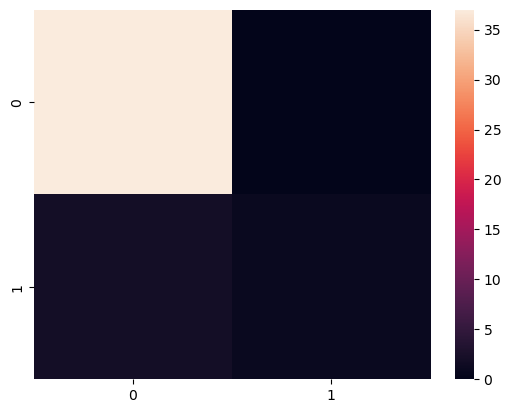

In [20]:
conMtx = confusion_matrix(y_test,y_pred)
sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")

In [65]:
class QRF:

    #X_train 
    #Y_train 
    x_bags = []
    y_bags =[]
    QDT = []
    no_QDT=0
    depth =0


    def __init__(self, x_train, y_train,  no_QDT = 10, depth =2 ):

        self.X_train= x_train
        self.y_train= y_train
        self.no_QDT = no_QDT
        self.depth = depth
        self.x_bags = [[] for j in range(no_QDT)]
        self.y_bags = [[] for j in range(no_QDT)]

      


    def Create_Models(self):

        for i in range(self.no_QDT):
            self.QDT.append(Reuploader(dev,self.depth))

    
    def data_bagging(self):

        k=0
        
        for j in range(self.no_QDT):
            x_bags =  []
            y_bags = []
            for i in range(int(len(self.X_train)/self.no_QDT)):
                
                
                x_bags.append(self.X_train[k])
                y_bags.append(self.y_train[k])
                k+=1
            self.x_bags[j] = (x_bags)
            self.y_bags[j] = (y_bags)
            
    
    def train(self):
    
        self.data_bagging()
        self.Create_Models()
        for i in range(len(self.QDT)):
            self.QDT[i].fit(np.array(self.x_bags[i]),np.array(self.y_bags[i]))
            #print(np.array(self.x_bags[i].shape))
    
    def predict(self,x_test,y_test):
        
        individual_results = []
        result = [0 for i in range(len(x_test))]

        for i  in range(len(self.QDT)):

            individual_results.append(self.QDT[i].predict(x_test,y_test))
        
        for i in range(len(individual_results)):

            sum_of_results = [0 for y in range(len(individual_results)) ]
            for j in range(len(individual_results[i])):
                #print(individual_results[i])
                sum_of_results[i]+= individual_results[i][j]
           
            if sum_of_results[i]/self.no_QDT > (self.no_QDT/2):
                result[i] = 1
            else:
                result[i] = 0
        return result



        




        

    
        

In [66]:
qrf = QRF(X_train,y_train)

qrf.train()


Epoch:  1 | Loss: 0.142800 |  accuracy: 0.812500 
Epoch:  2 | Loss: 0.142800 |  accuracy: 0.812500 
Epoch:  3 | Loss: 0.142800 |  accuracy: 0.812500 
Epoch:  4 | Loss: 0.142800 |  accuracy: 0.812500 
Epoch:  5 | Loss: 0.142800 |  accuracy: 0.812500 
Epoch:  6 | Loss: 0.142800 |  accuracy: 0.812500 
Epoch:  7 | Loss: 0.142800 |  accuracy: 0.812500 
Epoch:  8 | Loss: 0.142800 |  accuracy: 0.812500 
Epoch:  9 | Loss: 0.142800 |  accuracy: 0.812500 
Epoch: 10 | Loss: 0.142800 |  accuracy: 0.812500 
Epoch:  1 | Loss: 0.102571 |  accuracy: 0.937500 
Epoch:  2 | Loss: 0.102571 |  accuracy: 0.937500 
Epoch:  3 | Loss: 0.102571 |  accuracy: 0.937500 
Epoch:  4 | Loss: 0.102571 |  accuracy: 0.937500 
Epoch:  5 | Loss: 0.102571 |  accuracy: 0.937500 
Epoch:  6 | Loss: 0.102571 |  accuracy: 0.937500 
Epoch:  7 | Loss: 0.102571 |  accuracy: 0.937500 
Epoch:  8 | Loss: 0.102571 |  accuracy: 0.937500 
Epoch:  9 | Loss: 0.102571 |  accuracy: 0.937500 
Epoch: 10 | Loss: 0.102571 |  accuracy: 0.937500 


In [69]:

y_pred = qrf.predict(X_test, y_test)

In [71]:
print(y_pred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Recall(TP/FN+TP ):0.0
Precsion(TP/FP+TP): 0.0 
F1 score function of presscion and recall:0.0 


c:\Users\John\anaconda32\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


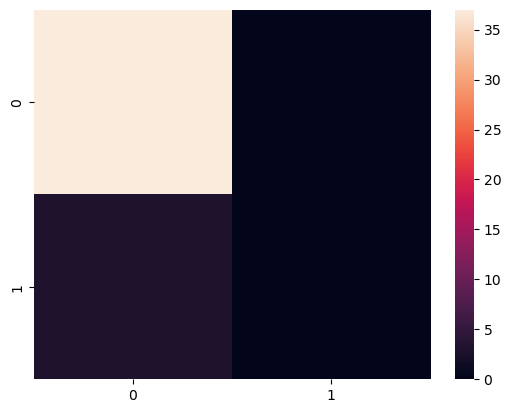

In [70]:
conMtx = confusion_matrix(y_test,y_pred)
sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")